In [56]:
import pandas as pd

# CSV 파일에서 데이터 읽기
# df1 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101344.csv')
# df2 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101435.csv')
# df3 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101553.csv')

df8 = pd.read_csv('../../Astar_results_dir/ByAstar_Rho_version_H3_Omega_part_20231214_143601.csv')
# df5 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_104100.csv')
# df6 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_104217.csv')
df7 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_part_20231220_134557.csv')
# df8 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_175318.csv')

# df = pd.concat([df1,df2,df3])
df = pd.concat([df8])

df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            83 non-null     object 
 1   gate length     83 non-null     int64  
 2   Theta           83 non-null     float64
 3   Phi             83 non-null     float64
 4   Omega           83 non-null     float64
 5   dt              83 non-null     float64
 6   combination     83 non-null     object 
 7   total time      83 non-null     float64
 8   computing time  83 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.0+ KB


array([[<Axes: title={'center': 'gate length'}>,
        <Axes: title={'center': 'Theta'}>,
        <Axes: title={'center': 'Phi'}>],
       [<Axes: title={'center': 'Omega'}>,
        <Axes: title={'center': 'dt'}>,
        <Axes: title={'center': 'total time'}>],
       [<Axes: title={'center': 'computing time'}>, <Axes: >, <Axes: >]],
      dtype=object)

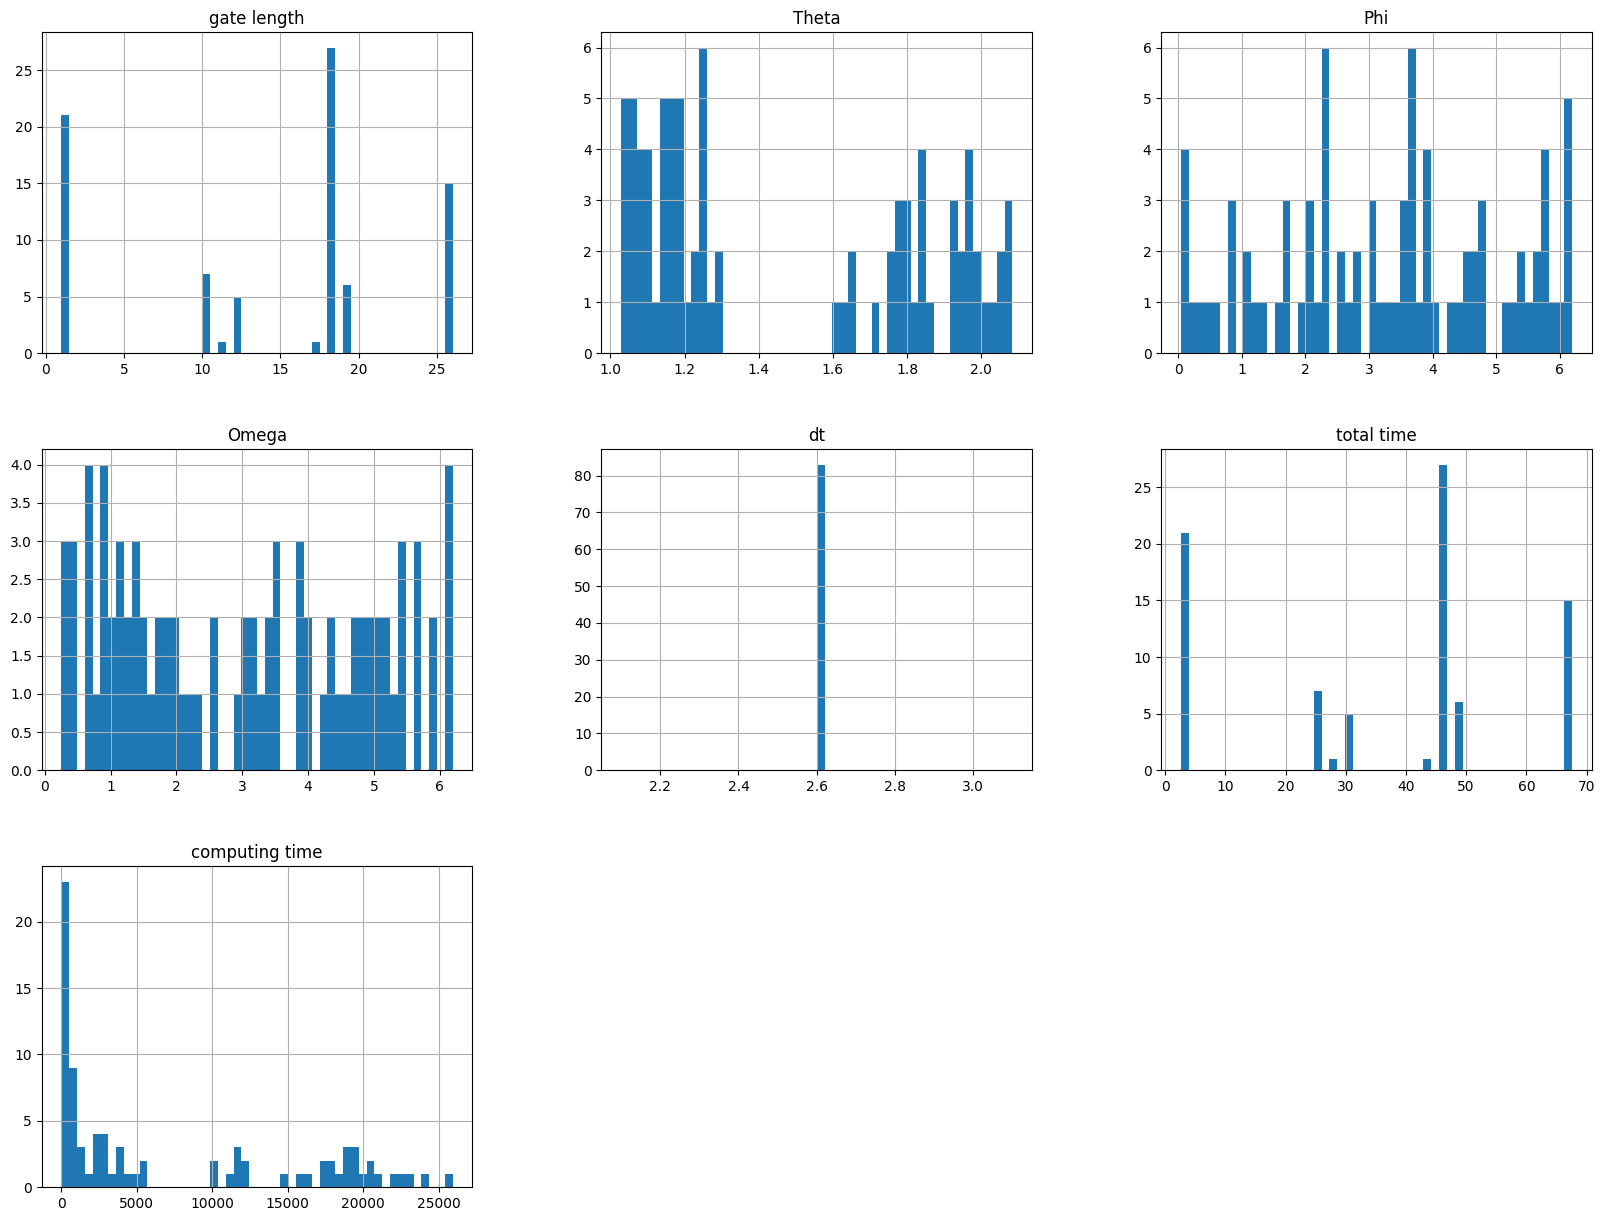

In [57]:
import matplotlib as plt

%matplotlib inline
df.hist(bins=50, figsize=(20,15))

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)

<Axes: xlabel='Theta', ylabel='Phi'>

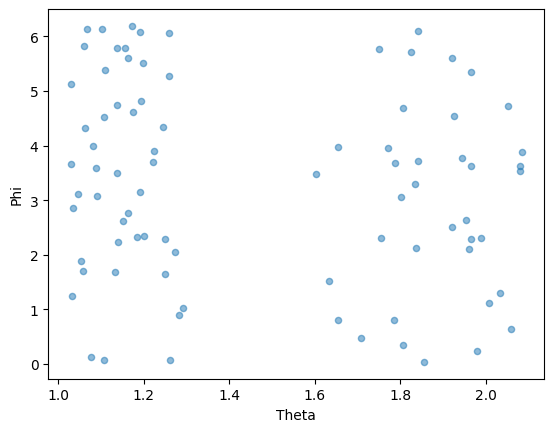

In [58]:
df.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 4 to 82
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            21 non-null     object 
 1   gate length     21 non-null     int64  
 2   Theta           21 non-null     float64
 3   Phi             21 non-null     float64
 4   Omega           21 non-null     float64
 5   dt              21 non-null     float64
 6   combination     21 non-null     object 
 7   total time      21 non-null     float64
 8   computing time  21 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.6+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

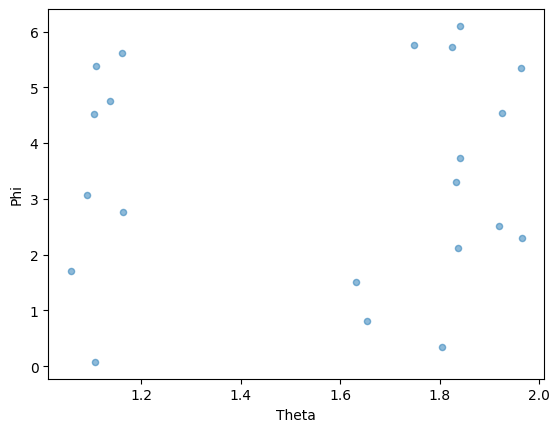

In [59]:
df_min1 = df[df['combination'] == '[-1]']

df_min1.info()

df_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 81
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            62 non-null     object 
 1   gate length     62 non-null     int64  
 2   Theta           62 non-null     float64
 3   Phi             62 non-null     float64
 4   Omega           62 non-null     float64
 5   dt              62 non-null     float64
 6   combination     62 non-null     object 
 7   total time      62 non-null     float64
 8   computing time  62 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

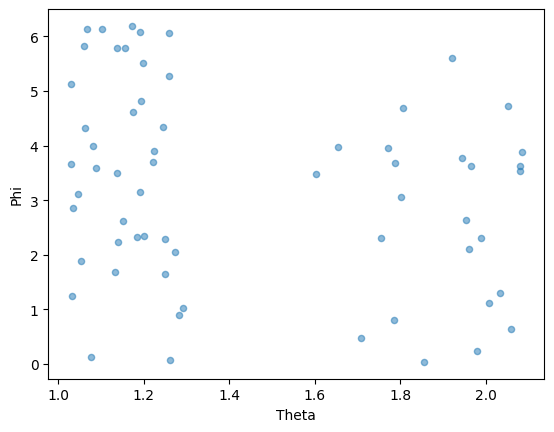

In [60]:
df_non_min1 = df[df['combination'] != '[-1]']

df_non_min1.info()

df_non_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)

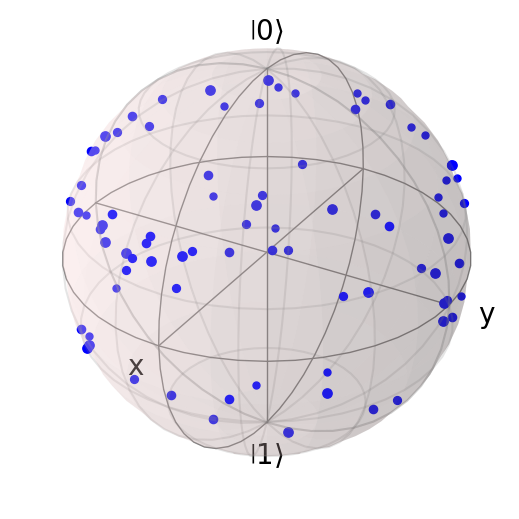

In [61]:
from qutip import *
import numpy as np

b = Bloch()
point_list = []

for index, row in df.iterrows():
    
    t, p = row['Theta'], row['Phi']  
    
    point = [np.sin(t) * np.cos(p),
             np.sin(t) * np.sin(p),
             np.cos(t)]
    
    b.add_points(point, 'm', alpha=1)
    # print(point)
    point_list.append(point)

b.point_marker = ['o']
b.show()